In [127]:
from __future__ import division
import os
import functools
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pkl
import pandas as pd
import bb
from bb.tools.hist_tools_modified import hist
from bb.tools.bb_plotter import make_fit_plot, make_bb_plot

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams.update({'font.size': 20})

# Amumu Bayesian Blocks Analysis

First, we will look at the 1b1f channel with no modifications.

In [129]:
# Load the channel
df = pd.read_csv('../../files/mass_values.dat', header=None, names=['Mass'])
bb_dir      = os.path.join(os.path.dirname(bb.__file__), '..')

# Assign random noise at the level of 1e-4 GeV to prevent duplicate events
np.random.seed(300)
df['Mass'] += np.random.normal(0,1e-5,size=len(df))
df = df.query('12<=Mass<=70')
xlimits=[12, 70]

In [131]:
df

,Mass
0,57.795935
1,55.779597
2,41.810746
3,39.896901
4,34.758178
5,57.569183
6,64.862736
7,56.953282
8,27.808661
9,26.906167


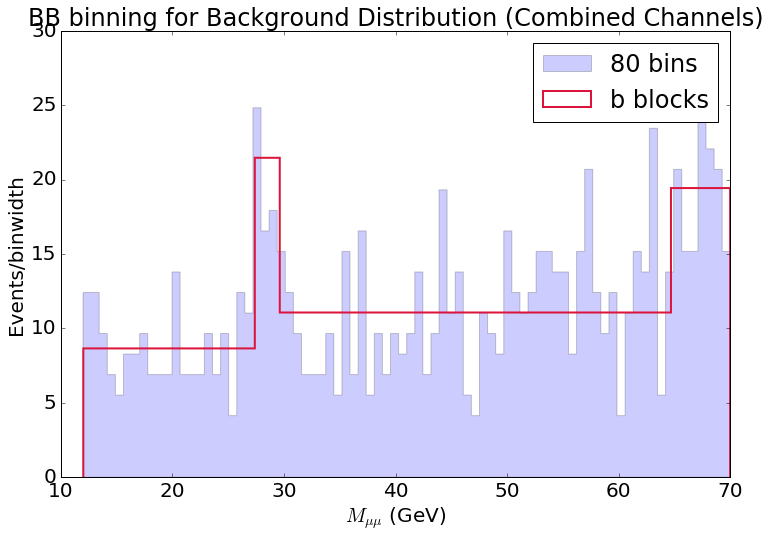

In [139]:
bc_data, be_data = make_bb_plot(df.Mass, 0.05, bb_dir+'/plots/', range=xlimits, scale='binwidth',
                title='BB binning for Background Distribution (Combined Channels)',
               xlabel=r'$M_{\mu\mu}$ (GeV)', ylabel='Events/binwidth', save_name='amumu_data_only')

The data forms 3 bins.  There is a single bin near the peak position.

In [140]:
print 'The bin edges'
print be_data

The bin edges
[ 12.02612708  27.39305101  29.62920976  64.68351946  69.98433206]


Now we'll make a binned signal model and combine it with the data.

In [134]:
np.random.seed(100)
signal_mc = np.random.normal(28.4, 1.18, size=40)

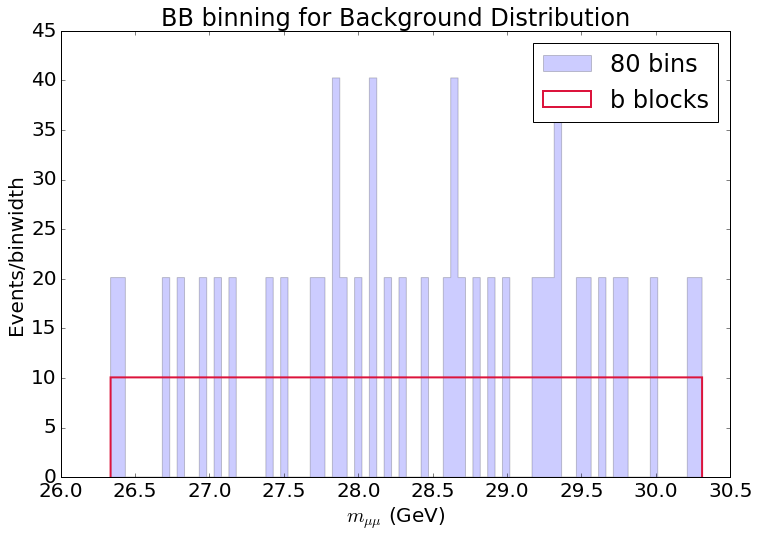

In [135]:
bc_sig, be_sig = make_bb_plot(signal_mc, 0.05, bb_dir+'/plots/', range=(min(signal_mc), max(signal_mc)), scale='binwidth',
                title='BB binning for Background Distribution',
               xlabel=r'$m_{\mu\mu}$ (GeV)', ylabel='Events/binwidth', save_name='amumu_signal_mc')

That's pretty easy.  Most rerolls of the random mc show either a single bin or two bins.  There are not yet enough signal events here to make a peaked distribution.  We'll combine this with the data to make a hybrid binning.

In [136]:
be_hybrid = np.concatenate([be_data[be_data<be_sig[0]], be_sig, be_data[be_data>be_sig[-1]]])

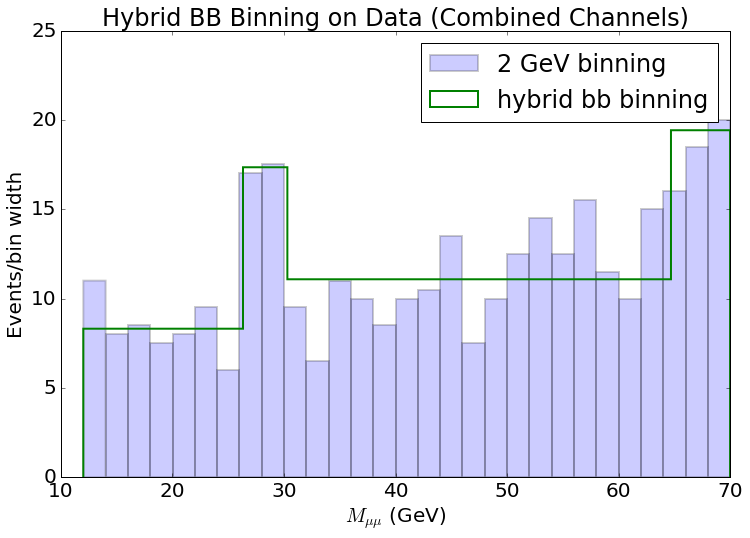

In [141]:
bc_bg_sig, _, _ = hist(df.Mass,29,scale='binwidth', linewidth = 2, label='2 GeV binning', alpha=0.2)
bc_bg_sig, _, _ = hist(df.Mass,be_hybrid,scale='binwidth', histtype='step', linewidth = 2, label='hybrid bb binning')
plt.title('Hybrid BB Binning on Data (Combined Channels)')
plt.xlabel('$M_{\mu\mu}$ (GeV)')
plt.ylabel('Events/bin width')
plt.legend()
plt.show()